## NonLinear Regression From Scratch 

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Data

In [2]:
train_set = np.array(pd.read_csv("data/auto-train-preprocessed.csv"))

test_set = np.array(pd.read_csv("data/auto-test-preprocessed.csv"))

train_set.shape, test_set.shape

((352, 2), (40, 2))

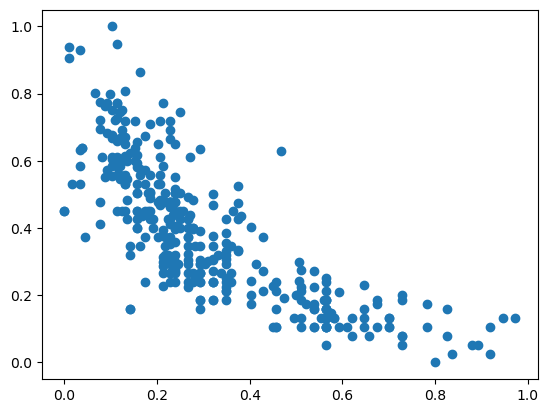

In [3]:
x_train = train_set[:, :-1]
y_train = train_set[:, -1:]
x_test = test_set[:, :-1]
y_test = test_set[:, -1:]
plt.scatter(x_train, y_train)

### Functions

In [4]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x


def linear_regression(x, w):
    y_hat = x @ w
    return y_hat


def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss


def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    return grads


def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w


def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Hyper Parameters

In [5]:
d = 3

w = np.random.randn(d+1, 1)
print(w.shape)

eta = 0.08
n_epochs = 3000

phi_x_train = polynomial(x_train)
phi_x_test = polynomial(x_test)

phi_x_train.shape , phi_x_test.shape

(4, 1)


((352, 4), (40, 4))

### Train Model

In [6]:
import joblib

loss_train_hist, loss_test_hist = [], []
best_loss = np.inf
n_es = 0

for epoch in range(n_epochs):
    # predictions
    y_hat_train = linear_regression(phi_x_train, w)
    y_hat_test = linear_regression(phi_x_test, w)
    # loss
    loss_train = mse(y_train, y_hat_train)
    loss_train_hist.append(loss_train)
    
    loss_test = mse(y_test, y_hat_test)
    loss_test_hist.append(loss_test)
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat_train)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    # early stopping
    if loss_test < best_loss:
        best_loss = loss_test
        joblib.dump(w, 'best-model.joblib')
        best_epoch = epoch
        n_es = 0
    else:
        n_es += 1
        if n_es >= 5:
            break
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}, \t w={w.T[0]}')

print(f'Best epoch:{best_epoch}, Best loss:{best_loss}')

Epoch=99, 	 Loss_train=0.02495,	 Loss_test=0.06491, 	 w=[ 0.534432   -0.38524987  0.44519573 -1.18404623]
Epoch=199, 	 Loss_train=0.02372,	 Loss_test=0.05623, 	 w=[ 0.53625794 -0.43009874  0.48520537 -1.10586951]
Epoch=299, 	 Loss_train=0.02272,	 Loss_test=0.05111, 	 w=[ 0.54468006 -0.48499815  0.51142991 -1.04117709]
Epoch=399, 	 Loss_train=0.02183,	 Loss_test=0.04717, 	 w=[ 0.55459591 -0.54063691  0.53294043 -0.98254526]
Epoch=499, 	 Loss_train=0.02103,	 Loss_test=0.04378, 	 w=[ 0.56455709 -0.59444461  0.55238728 -0.9277243 ]
Epoch=599, 	 Loss_train=0.02032,	 Loss_test=0.04076, 	 w=[ 0.57416629 -0.64578618  0.57056995 -0.87596017]
Epoch=699, 	 Loss_train=0.01967,	 Loss_test=0.03803, 	 w=[ 0.58332789 -0.69457847  0.58775311 -0.82693493]
Epoch=799, 	 Loss_train=0.01909,	 Loss_test=0.03557, 	 w=[ 0.59203215 -0.74089211  0.60404563 -0.78046146]
Epoch=899, 	 Loss_train=0.01856,	 Loss_test=0.03333, 	 w=[ 0.60029317 -0.78483715  0.61950988 -0.73639518]
Epoch=999, 	 Loss_train=0.01809,	 Loss

### Visualize

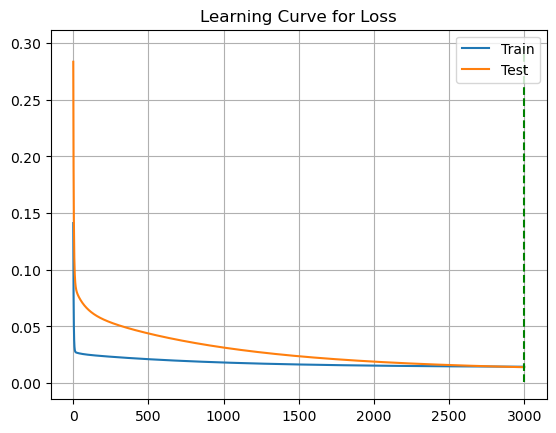

In [7]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

ymin, ymax = plt.ylim()
plt.vlines(best_epoch, ymin, ymax, color='g', linestyles='--')
plt.title('Learning Curve for Loss');
plt.legend()
plt.grid()

### Save And Load W's

In [ ]:
np.savetxt("W's Of NonLinear Regression", w)
print(np.loadtxt("W's Of NonLinear Regression"))

[ 0.7025034  -1.32899636  0.81330765 -0.1937957 ]


In [ ]:
w = np.loadtxt("W's Of NonLinear Regression")


### Visualize Train , Test And Plot Regression Line

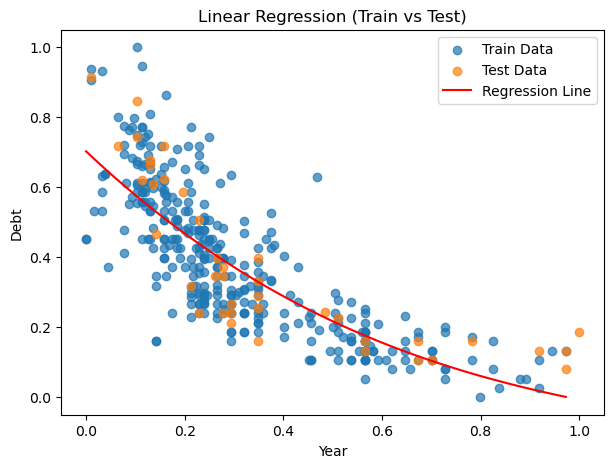

In [10]:
min_x = min(x_train.min(), x_test.min())
max_x = max(x_train.max(), x_test.max())

x_line_plot = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
x_line = polynomial(x_line_plot)
y_line = linear_regression(x_line, w).reshape(-1)

plt.figure(figsize=(7, 5))
plt.scatter(x_train, y_train, label="Train Data", alpha=0.7)
plt.scatter(x_test, y_test, label="Test Data", alpha=0.7)
plt.plot(x_line_plot, y_line, "r", label="Regression Line")
plt.legend()
plt.title("Linear Regression (Train vs Test)")
plt.xlabel("Year")
plt.ylabel("Debt")
plt.show()

### Test Model

In [11]:
phi_x_test = polynomial(x_test)
print(phi_x_test.shape)

y_hat_test = linear_regression(phi_x_test, w.reshape(-1, 1))
print(y_hat_test.shape)

print(f"R2: {float(r2(y_test, y_hat_test)):.4}")
print(f"MAE: {float(mse(y_test , y_hat_test)):.4}")

(40, 4)
(40, 1)
R2: 0.7339
MAE: 0.01395
